# Clone the repositories

# Download the dataset

In [1]:
!chmod +x download.sh

# Preprocessing

## build_vocab

In [1]:
import nltk
import pickle
import argparse
from collections import Counter
from pycocotools.coco import COCO


class Vocabulary(object):
    """Simple vocabulary wrapper."""
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

def build_vocab(json, threshold):
    """Build a simple vocabulary wrapper."""
    coco = COCO(json)
    counter = Counter()
    ids = coco.anns.keys()
    for i, id in enumerate(ids):
        caption = str(coco.anns[id]['caption'])
        tokens = nltk.tokenize.word_tokenize(caption.lower())
        counter.update(tokens)

        if (i+1) % 1000 == 0:
            print("[{}/{}] Tokenized the captions.".format(i+1, len(ids)))

    # If the word frequency is less than 'threshold', then the word is discarded.
    words = [word for word, cnt in counter.items() if cnt >= threshold]

    # Create a vocab wrapper and add some special tokens.
    vocab = Vocabulary()
    vocab.add_word('<pad>')
    vocab.add_word('<start>')
    vocab.add_word('<end>')
    vocab.add_word('<unk>')

    # Add the words to the vocabulary.
    for i, word in enumerate(words):
        vocab.add_word(word)
    return vocab

def main(args):
    vocab = build_vocab(json=args.caption_path, threshold=args.threshold)
    vocab_path = args.vocab_path
    with open(vocab_path, 'wb') as f:
        pickle.dump(vocab, f)
    print("Total vocabulary size: {}".format(len(vocab)))
    print("Saved the vocabulary wrapper to '{}'".format(vocab_path))


# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--caption_path', type=str, 
#                         default='data/annotations/captions_train2014.json', 
#                         help='path for train annotation file')
#     parser.add_argument('--vocab_path', type=str, default='./data/vocab.pkl', 
#                         help='path for saving vocabulary wrapper')
#     parser.add_argument('--threshold', type=int, default=4, 
#                         help='minimum word count threshold')
#     args = parser.parse_args()
#     main(args)

In [4]:
parser = argparse.ArgumentParser()
parser.add_argument('--caption_path', type=str, 
                    default='data/annotations/captions_train2014.json', 
                    help='path for train annotation file')
parser.add_argument('--vocab_path', type=str, default='./data/vocab.pkl', 
                    help='path for saving vocabulary wrapper')
parser.add_argument('--threshold', type=int, default=4, 
                    help='minimum word count threshold')
args = parser.parse_args("")
main(args)

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!
[1000/414113] Tokenized the captions.
[2000/414113] Tokenized the captions.
[3000/414113] Tokenized the captions.
[4000/414113] Tokenized the captions.
[5000/414113] Tokenized the captions.
[6000/414113] Tokenized the captions.
[7000/414113] Tokenized the captions.
[8000/414113] Tokenized the captions.
[9000/414113] Tokenized the captions.
[10000/414113] Tokenized the captions.
[11000/414113] Tokenized the captions.
[12000/414113] Tokenized the captions.
[13000/414113] Tokenized the captions.
[14000/414113] Tokenized the captions.
[15000/414113] Tokenized the captions.
[16000/414113] Tokenized the captions.
[17000/414113] Tokenized the captions.
[18000/414113] Tokenized the captions.
[19000/414113] Tokenized the captions.
[20000/414113] Tokenized the captions.
[21000/414113] Tokenized the captions.
[22000/414113] Tokenized the captions.
[23000/414113] Tokenized the captions.
[24000/414113] Tokenized the 

[209000/414113] Tokenized the captions.
[210000/414113] Tokenized the captions.
[211000/414113] Tokenized the captions.
[212000/414113] Tokenized the captions.
[213000/414113] Tokenized the captions.
[214000/414113] Tokenized the captions.
[215000/414113] Tokenized the captions.
[216000/414113] Tokenized the captions.
[217000/414113] Tokenized the captions.
[218000/414113] Tokenized the captions.
[219000/414113] Tokenized the captions.
[220000/414113] Tokenized the captions.
[221000/414113] Tokenized the captions.
[222000/414113] Tokenized the captions.
[223000/414113] Tokenized the captions.
[224000/414113] Tokenized the captions.
[225000/414113] Tokenized the captions.
[226000/414113] Tokenized the captions.
[227000/414113] Tokenized the captions.
[228000/414113] Tokenized the captions.
[229000/414113] Tokenized the captions.
[230000/414113] Tokenized the captions.
[231000/414113] Tokenized the captions.
[232000/414113] Tokenized the captions.
[233000/414113] Tokenized the captions.


## resize

In [5]:
import argparse
import os
from PIL import Image


def resize_image(image, size):
    """Resize an image to the given size."""
    return image.resize(size, Image.ANTIALIAS)

def resize_images(image_dir, output_dir, size):
    """Resize the images in 'image_dir' and save into 'output_dir'."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    images = os.listdir(image_dir)
    num_images = len(images)
    for i, image in enumerate(images):
        with open(os.path.join(image_dir, image), 'r+b') as f:
            with Image.open(f) as img:
                img = resize_image(img, size)
                img.save(os.path.join(output_dir, image), img.format)
        if (i+1) % 100 == 0:
            print ("[{}/{}] Resized the images and saved into '{}'."
                   .format(i+1, num_images, output_dir))

def main(args):
    image_dir = args.image_dir
    output_dir = args.output_dir
    image_size = [args.image_size, args.image_size]
    resize_images(image_dir, output_dir, image_size)


# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--image_dir', type=str, default='./data/train2014/',
#                         help='directory for train images')
#     parser.add_argument('--output_dir', type=str, default='./data/resized2014/',
#                         help='directory for saving resized images')
#     parser.add_argument('--image_size', type=int, default=256,
#                         help='size for image after processing')
#     args = parser.parse_args()
#     main(args)

In [7]:
parser = argparse.ArgumentParser()
parser.add_argument('--image_dir', type=str, default='./data/train2014/',
                    help='directory for train images')
parser.add_argument('--output_dir', type=str, default='./data/resized2014/',
                    help='directory for saving resized images')
parser.add_argument('--image_size', type=int, default=256,
                    help='size for image after processing')
args = parser.parse_args("")
main(args)

[100/82783] Resized the images and saved into './data/resized2014/'.
[200/82783] Resized the images and saved into './data/resized2014/'.
[300/82783] Resized the images and saved into './data/resized2014/'.
[400/82783] Resized the images and saved into './data/resized2014/'.
[500/82783] Resized the images and saved into './data/resized2014/'.
[600/82783] Resized the images and saved into './data/resized2014/'.
[700/82783] Resized the images and saved into './data/resized2014/'.
[800/82783] Resized the images and saved into './data/resized2014/'.
[900/82783] Resized the images and saved into './data/resized2014/'.
[1000/82783] Resized the images and saved into './data/resized2014/'.
[1100/82783] Resized the images and saved into './data/resized2014/'.
[1200/82783] Resized the images and saved into './data/resized2014/'.
[1300/82783] Resized the images and saved into './data/resized2014/'.
[1400/82783] Resized the images and saved into './data/resized2014/'.
[1500/82783] Resized the imag

[11800/82783] Resized the images and saved into './data/resized2014/'.
[11900/82783] Resized the images and saved into './data/resized2014/'.
[12000/82783] Resized the images and saved into './data/resized2014/'.
[12100/82783] Resized the images and saved into './data/resized2014/'.
[12200/82783] Resized the images and saved into './data/resized2014/'.
[12300/82783] Resized the images and saved into './data/resized2014/'.
[12400/82783] Resized the images and saved into './data/resized2014/'.
[12500/82783] Resized the images and saved into './data/resized2014/'.
[12600/82783] Resized the images and saved into './data/resized2014/'.
[12700/82783] Resized the images and saved into './data/resized2014/'.
[12800/82783] Resized the images and saved into './data/resized2014/'.
[12900/82783] Resized the images and saved into './data/resized2014/'.
[13000/82783] Resized the images and saved into './data/resized2014/'.
[13100/82783] Resized the images and saved into './data/resized2014/'.
[13200

[23400/82783] Resized the images and saved into './data/resized2014/'.
[23500/82783] Resized the images and saved into './data/resized2014/'.
[23600/82783] Resized the images and saved into './data/resized2014/'.
[23700/82783] Resized the images and saved into './data/resized2014/'.
[23800/82783] Resized the images and saved into './data/resized2014/'.
[23900/82783] Resized the images and saved into './data/resized2014/'.
[24000/82783] Resized the images and saved into './data/resized2014/'.
[24100/82783] Resized the images and saved into './data/resized2014/'.
[24200/82783] Resized the images and saved into './data/resized2014/'.
[24300/82783] Resized the images and saved into './data/resized2014/'.
[24400/82783] Resized the images and saved into './data/resized2014/'.
[24500/82783] Resized the images and saved into './data/resized2014/'.
[24600/82783] Resized the images and saved into './data/resized2014/'.
[24700/82783] Resized the images and saved into './data/resized2014/'.
[24800

[35000/82783] Resized the images and saved into './data/resized2014/'.
[35100/82783] Resized the images and saved into './data/resized2014/'.
[35200/82783] Resized the images and saved into './data/resized2014/'.
[35300/82783] Resized the images and saved into './data/resized2014/'.
[35400/82783] Resized the images and saved into './data/resized2014/'.
[35500/82783] Resized the images and saved into './data/resized2014/'.
[35600/82783] Resized the images and saved into './data/resized2014/'.
[35700/82783] Resized the images and saved into './data/resized2014/'.
[35800/82783] Resized the images and saved into './data/resized2014/'.
[35900/82783] Resized the images and saved into './data/resized2014/'.
[36000/82783] Resized the images and saved into './data/resized2014/'.
[36100/82783] Resized the images and saved into './data/resized2014/'.
[36200/82783] Resized the images and saved into './data/resized2014/'.
[36300/82783] Resized the images and saved into './data/resized2014/'.
[36400

[46600/82783] Resized the images and saved into './data/resized2014/'.
[46700/82783] Resized the images and saved into './data/resized2014/'.
[46800/82783] Resized the images and saved into './data/resized2014/'.
[46900/82783] Resized the images and saved into './data/resized2014/'.
[47000/82783] Resized the images and saved into './data/resized2014/'.
[47100/82783] Resized the images and saved into './data/resized2014/'.
[47200/82783] Resized the images and saved into './data/resized2014/'.
[47300/82783] Resized the images and saved into './data/resized2014/'.
[47400/82783] Resized the images and saved into './data/resized2014/'.
[47500/82783] Resized the images and saved into './data/resized2014/'.
[47600/82783] Resized the images and saved into './data/resized2014/'.
[47700/82783] Resized the images and saved into './data/resized2014/'.
[47800/82783] Resized the images and saved into './data/resized2014/'.
[47900/82783] Resized the images and saved into './data/resized2014/'.
[48000

[58200/82783] Resized the images and saved into './data/resized2014/'.
[58300/82783] Resized the images and saved into './data/resized2014/'.
[58400/82783] Resized the images and saved into './data/resized2014/'.
[58500/82783] Resized the images and saved into './data/resized2014/'.
[58600/82783] Resized the images and saved into './data/resized2014/'.
[58700/82783] Resized the images and saved into './data/resized2014/'.
[58800/82783] Resized the images and saved into './data/resized2014/'.
[58900/82783] Resized the images and saved into './data/resized2014/'.
[59000/82783] Resized the images and saved into './data/resized2014/'.
[59100/82783] Resized the images and saved into './data/resized2014/'.
[59200/82783] Resized the images and saved into './data/resized2014/'.
[59300/82783] Resized the images and saved into './data/resized2014/'.
[59400/82783] Resized the images and saved into './data/resized2014/'.
[59500/82783] Resized the images and saved into './data/resized2014/'.
[59600

[69800/82783] Resized the images and saved into './data/resized2014/'.
[69900/82783] Resized the images and saved into './data/resized2014/'.
[70000/82783] Resized the images and saved into './data/resized2014/'.
[70100/82783] Resized the images and saved into './data/resized2014/'.
[70200/82783] Resized the images and saved into './data/resized2014/'.
[70300/82783] Resized the images and saved into './data/resized2014/'.
[70400/82783] Resized the images and saved into './data/resized2014/'.
[70500/82783] Resized the images and saved into './data/resized2014/'.
[70600/82783] Resized the images and saved into './data/resized2014/'.
[70700/82783] Resized the images and saved into './data/resized2014/'.
[70800/82783] Resized the images and saved into './data/resized2014/'.
[70900/82783] Resized the images and saved into './data/resized2014/'.
[71000/82783] Resized the images and saved into './data/resized2014/'.
[71100/82783] Resized the images and saved into './data/resized2014/'.
[71200

[81400/82783] Resized the images and saved into './data/resized2014/'.
[81500/82783] Resized the images and saved into './data/resized2014/'.
[81600/82783] Resized the images and saved into './data/resized2014/'.
[81700/82783] Resized the images and saved into './data/resized2014/'.
[81800/82783] Resized the images and saved into './data/resized2014/'.
[81900/82783] Resized the images and saved into './data/resized2014/'.
[82000/82783] Resized the images and saved into './data/resized2014/'.
[82100/82783] Resized the images and saved into './data/resized2014/'.
[82200/82783] Resized the images and saved into './data/resized2014/'.
[82300/82783] Resized the images and saved into './data/resized2014/'.
[82400/82783] Resized the images and saved into './data/resized2014/'.
[82500/82783] Resized the images and saved into './data/resized2014/'.
[82600/82783] Resized the images and saved into './data/resized2014/'.
[82700/82783] Resized the images and saved into './data/resized2014/'.


# Train the model

In [8]:
import argparse
import torch
import torch.nn as nn
import numpy as np
import os
import pickle
from data_loader import get_loader 
from build_vocab import Vocabulary
from model import EncoderCNN, DecoderRNN
from torch.nn.utils.rnn import pack_padded_sequence
from torchvision import transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def main(args):
    # Create model directory
    if not os.path.exists(args.model_path):
        os.makedirs(args.model_path)
    
    # Image preprocessing, normalization for the pretrained resnet
    transform = transforms.Compose([ 
        transforms.RandomCrop(args.crop_size),
        transforms.RandomHorizontalFlip(), 
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
    
    # Load vocabulary wrapper
    with open(args.vocab_path, 'rb') as f:
        vocab = pickle.load(f)
    
    # Build data loader
    data_loader = get_loader(args.image_dir, args.caption_path, vocab, 
                             transform, args.batch_size,
                             shuffle=True, num_workers=args.num_workers) 

    # Build the models
    encoder = EncoderCNN(args.embed_size).to(device)
    decoder = DecoderRNN(args.embed_size, args.hidden_size, len(vocab), args.num_layers).to(device)
    
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    params = list(decoder.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters())
    optimizer = torch.optim.Adam(params, lr=args.learning_rate)
    
    # Train the models
    total_step = len(data_loader)
    for epoch in range(args.num_epochs):
        for i, (images, captions, lengths) in enumerate(data_loader):
            
            # Set mini-batch dataset
            images = images.to(device)
            captions = captions.to(device)
            targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
            
            # Forward, backward and optimize
            features = encoder(images)
            outputs = decoder(features, captions, lengths)
            loss = criterion(outputs, targets)
            decoder.zero_grad()
            encoder.zero_grad()
            loss.backward()
            optimizer.step()

            # Print log info
            if i % args.log_step == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Perplexity: {:5.4f}'
                      .format(epoch, args.num_epochs, i, total_step, loss.item(), np.exp(loss.item()))) 
                
            # Save the model checkpoints
            if (i+1) % args.save_step == 0:
                torch.save(decoder.state_dict(), os.path.join(
                    args.model_path, 'decoder-{}-{}.ckpt'.format(epoch+1, i+1)))
                torch.save(encoder.state_dict(), os.path.join(
                    args.model_path, 'encoder-{}-{}.ckpt'.format(epoch+1, i+1)))


# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--model_path', type=str, default='models/' , help='path for saving trained models')
#     parser.add_argument('--crop_size', type=int, default=224 , help='size for randomly cropping images')
#     parser.add_argument('--vocab_path', type=str, default='data/vocab.pkl', help='path for vocabulary wrapper')
#     parser.add_argument('--image_dir', type=str, default='data/resized2014', help='directory for resized images')
#     parser.add_argument('--caption_path', type=str, default='data/annotations/captions_train2014.json', help='path for train annotation json file')
#     parser.add_argument('--log_step', type=int , default=10, help='step size for prining log info')
#     parser.add_argument('--save_step', type=int , default=1000, help='step size for saving trained models')
    
#     # Model parameters
#     parser.add_argument('--embed_size', type=int , default=256, help='dimension of word embedding vectors')
#     parser.add_argument('--hidden_size', type=int , default=512, help='dimension of lstm hidden states')
#     parser.add_argument('--num_layers', type=int , default=1, help='number of layers in lstm')
    
#     parser.add_argument('--num_epochs', type=int, default=5)
#     parser.add_argument('--batch_size', type=int, default=128)
#     parser.add_argument('--num_workers', type=int, default=2)
#     parser.add_argument('--learning_rate', type=float, default=0.001)
#     args = parser.parse_args()
#     print(args)
#     main(args)

In [9]:
parser = argparse.ArgumentParser()
parser.add_argument('--model_path', type=str, default='models/' , help='path for saving trained models')
parser.add_argument('--crop_size', type=int, default=224 , help='size for randomly cropping images')
parser.add_argument('--vocab_path', type=str, default='data/vocab.pkl', help='path for vocabulary wrapper')
parser.add_argument('--image_dir', type=str, default='data/resized2014', help='directory for resized images')
parser.add_argument('--caption_path', type=str, default='data/annotations/captions_train2014.json', help='path for train annotation json file')
parser.add_argument('--log_step', type=int , default=10, help='step size for prining log info')
parser.add_argument('--save_step', type=int , default=1000, help='step size for saving trained models')

# Model parameters
parser.add_argument('--embed_size', type=int , default=256, help='dimension of word embedding vectors')
parser.add_argument('--hidden_size', type=int , default=512, help='dimension of lstm hidden states')
parser.add_argument('--num_layers', type=int , default=1, help='number of layers in lstm')

parser.add_argument('--num_epochs', type=int, default=5)
parser.add_argument('--batch_size', type=int, default=128)
parser.add_argument('--num_workers', type=int, default=2)
parser.add_argument('--learning_rate', type=float, default=0.001)
args = parser.parse_args("")
print(args)
main(args)

Namespace(batch_size=128, caption_path='data/annotations/captions_train2014.json', crop_size=224, embed_size=256, hidden_size=512, image_dir='data/resized2014', learning_rate=0.001, log_step=10, model_path='models/', num_epochs=5, num_layers=1, num_workers=2, save_step=1000, vocab_path='data/vocab.pkl')
loading annotations into memory...
Done (t=0.53s)
creating index...
index created!


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/yang/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:38<00:00, 6232062.31it/s]


Epoch [0/5], Step [0/3236], Loss: 9.2077, Perplexity: 9973.5433
Epoch [0/5], Step [10/3236], Loss: 5.8543, Perplexity: 348.7430
Epoch [0/5], Step [20/3236], Loss: 5.4100, Perplexity: 223.6384
Epoch [0/5], Step [30/3236], Loss: 4.9471, Perplexity: 140.7656
Epoch [0/5], Step [40/3236], Loss: 4.6509, Perplexity: 104.6740
Epoch [0/5], Step [50/3236], Loss: 4.4000, Perplexity: 81.4538
Epoch [0/5], Step [60/3236], Loss: 4.2346, Perplexity: 69.0357
Epoch [0/5], Step [70/3236], Loss: 4.1448, Perplexity: 63.1023
Epoch [0/5], Step [80/3236], Loss: 4.1314, Perplexity: 62.2629
Epoch [0/5], Step [90/3236], Loss: 3.9270, Perplexity: 50.7540
Epoch [0/5], Step [100/3236], Loss: 3.9115, Perplexity: 49.9738
Epoch [0/5], Step [110/3236], Loss: 3.8430, Perplexity: 46.6643
Epoch [0/5], Step [120/3236], Loss: 3.7466, Perplexity: 42.3756
Epoch [0/5], Step [130/3236], Loss: 3.6670, Perplexity: 39.1326
Epoch [0/5], Step [140/3236], Loss: 3.6040, Perplexity: 36.7445
Epoch [0/5], Step [150/3236], Loss: 3.7788, P

Epoch [0/5], Step [1280/3236], Loss: 2.5511, Perplexity: 12.8217
Epoch [0/5], Step [1290/3236], Loss: 2.6066, Perplexity: 13.5531
Epoch [0/5], Step [1300/3236], Loss: 2.5035, Perplexity: 12.2255
Epoch [0/5], Step [1310/3236], Loss: 2.5370, Perplexity: 12.6421
Epoch [0/5], Step [1320/3236], Loss: 2.5514, Perplexity: 12.8244
Epoch [0/5], Step [1330/3236], Loss: 2.3010, Perplexity: 9.9846
Epoch [0/5], Step [1340/3236], Loss: 2.4205, Perplexity: 11.2510
Epoch [0/5], Step [1350/3236], Loss: 2.4647, Perplexity: 11.7597
Epoch [0/5], Step [1360/3236], Loss: 2.3990, Perplexity: 11.0124
Epoch [0/5], Step [1370/3236], Loss: 2.4237, Perplexity: 11.2876
Epoch [0/5], Step [1380/3236], Loss: 2.4427, Perplexity: 11.5038
Epoch [0/5], Step [1390/3236], Loss: 2.5340, Perplexity: 12.6039
Epoch [0/5], Step [1400/3236], Loss: 2.4391, Perplexity: 11.4624
Epoch [0/5], Step [1410/3236], Loss: 2.4331, Perplexity: 11.3936
Epoch [0/5], Step [1420/3236], Loss: 2.3581, Perplexity: 10.5705
Epoch [0/5], Step [1430/32

Epoch [0/5], Step [2550/3236], Loss: 2.3921, Perplexity: 10.9366
Epoch [0/5], Step [2560/3236], Loss: 2.2812, Perplexity: 9.7888
Epoch [0/5], Step [2570/3236], Loss: 2.3551, Perplexity: 10.5392
Epoch [0/5], Step [2580/3236], Loss: 2.2845, Perplexity: 9.8204
Epoch [0/5], Step [2590/3236], Loss: 2.2213, Perplexity: 9.2195
Epoch [0/5], Step [2600/3236], Loss: 2.3841, Perplexity: 10.8491
Epoch [0/5], Step [2610/3236], Loss: 2.2095, Perplexity: 9.1116
Epoch [0/5], Step [2620/3236], Loss: 2.3629, Perplexity: 10.6221
Epoch [0/5], Step [2630/3236], Loss: 2.2997, Perplexity: 9.9712
Epoch [0/5], Step [2640/3236], Loss: 2.2730, Perplexity: 9.7081
Epoch [0/5], Step [2650/3236], Loss: 2.1502, Perplexity: 8.5862
Epoch [0/5], Step [2660/3236], Loss: 2.2516, Perplexity: 9.5030
Epoch [0/5], Step [2670/3236], Loss: 2.2537, Perplexity: 9.5231
Epoch [0/5], Step [2680/3236], Loss: 2.2459, Perplexity: 9.4486
Epoch [0/5], Step [2690/3236], Loss: 2.3722, Perplexity: 10.7205
Epoch [0/5], Step [2700/3236], Loss

Epoch [1/5], Step [600/3236], Loss: 2.2150, Perplexity: 9.1613
Epoch [1/5], Step [610/3236], Loss: 2.1685, Perplexity: 8.7451
Epoch [1/5], Step [620/3236], Loss: 2.1670, Perplexity: 8.7323
Epoch [1/5], Step [630/3236], Loss: 2.1121, Perplexity: 8.2654
Epoch [1/5], Step [640/3236], Loss: 2.3154, Perplexity: 10.1286
Epoch [1/5], Step [650/3236], Loss: 2.2139, Perplexity: 9.1516
Epoch [1/5], Step [660/3236], Loss: 2.1912, Perplexity: 8.9458
Epoch [1/5], Step [670/3236], Loss: 2.2361, Perplexity: 9.3571
Epoch [1/5], Step [680/3236], Loss: 2.1942, Perplexity: 8.9730
Epoch [1/5], Step [690/3236], Loss: 2.0822, Perplexity: 8.0219
Epoch [1/5], Step [700/3236], Loss: 2.1956, Perplexity: 8.9853
Epoch [1/5], Step [710/3236], Loss: 2.1089, Perplexity: 8.2389
Epoch [1/5], Step [720/3236], Loss: 2.2596, Perplexity: 9.5790
Epoch [1/5], Step [730/3236], Loss: 2.1920, Perplexity: 8.9530
Epoch [1/5], Step [740/3236], Loss: 2.2515, Perplexity: 9.5020
Epoch [1/5], Step [750/3236], Loss: 2.0754, Perplexity

Epoch [1/5], Step [1890/3236], Loss: 2.1196, Perplexity: 8.3275
Epoch [1/5], Step [1900/3236], Loss: 2.1028, Perplexity: 8.1891
Epoch [1/5], Step [1910/3236], Loss: 2.1785, Perplexity: 8.8333
Epoch [1/5], Step [1920/3236], Loss: 2.1436, Perplexity: 8.5300
Epoch [1/5], Step [1930/3236], Loss: 2.0658, Perplexity: 7.8913
Epoch [1/5], Step [1940/3236], Loss: 2.1077, Perplexity: 8.2291
Epoch [1/5], Step [1950/3236], Loss: 2.0824, Perplexity: 8.0236
Epoch [1/5], Step [1960/3236], Loss: 2.2173, Perplexity: 9.1827
Epoch [1/5], Step [1970/3236], Loss: 2.0774, Perplexity: 7.9833
Epoch [1/5], Step [1980/3236], Loss: 1.9901, Perplexity: 7.3162
Epoch [1/5], Step [1990/3236], Loss: 2.2052, Perplexity: 9.0718
Epoch [1/5], Step [2000/3236], Loss: 2.0540, Perplexity: 7.7993
Epoch [1/5], Step [2010/3236], Loss: 2.0825, Perplexity: 8.0248
Epoch [1/5], Step [2020/3236], Loss: 2.2722, Perplexity: 9.7003
Epoch [1/5], Step [2030/3236], Loss: 2.1351, Perplexity: 8.4582
Epoch [1/5], Step [2040/3236], Loss: 2.1

Epoch [1/5], Step [3170/3236], Loss: 2.0832, Perplexity: 8.0299
Epoch [1/5], Step [3180/3236], Loss: 2.2061, Perplexity: 9.0801
Epoch [1/5], Step [3190/3236], Loss: 2.0840, Perplexity: 8.0362
Epoch [1/5], Step [3200/3236], Loss: 2.2180, Perplexity: 9.1892
Epoch [1/5], Step [3210/3236], Loss: 2.2613, Perplexity: 9.5957
Epoch [1/5], Step [3220/3236], Loss: 2.0877, Perplexity: 8.0664
Epoch [1/5], Step [3230/3236], Loss: 2.1453, Perplexity: 8.5446
Epoch [2/5], Step [0/3236], Loss: 2.0174, Perplexity: 7.5189
Epoch [2/5], Step [10/3236], Loss: 1.9680, Perplexity: 7.1560
Epoch [2/5], Step [20/3236], Loss: 2.0332, Perplexity: 7.6384
Epoch [2/5], Step [30/3236], Loss: 1.9284, Perplexity: 6.8784
Epoch [2/5], Step [40/3236], Loss: 2.0234, Perplexity: 7.5640
Epoch [2/5], Step [50/3236], Loss: 2.0588, Perplexity: 7.8370
Epoch [2/5], Step [60/3236], Loss: 2.0420, Perplexity: 7.7059
Epoch [2/5], Step [70/3236], Loss: 2.0034, Perplexity: 7.4142
Epoch [2/5], Step [80/3236], Loss: 2.0671, Perplexity: 7.

Epoch [2/5], Step [1230/3236], Loss: 1.9845, Perplexity: 7.2753
Epoch [2/5], Step [1240/3236], Loss: 2.0396, Perplexity: 7.6877
Epoch [2/5], Step [1250/3236], Loss: 1.9945, Perplexity: 7.3484
Epoch [2/5], Step [1260/3236], Loss: 2.1098, Perplexity: 8.2464
Epoch [2/5], Step [1270/3236], Loss: 2.0283, Perplexity: 7.6008
Epoch [2/5], Step [1280/3236], Loss: 2.0182, Perplexity: 7.5251
Epoch [2/5], Step [1290/3236], Loss: 1.9783, Perplexity: 7.2303
Epoch [2/5], Step [1300/3236], Loss: 2.1143, Perplexity: 8.2834
Epoch [2/5], Step [1310/3236], Loss: 2.0994, Perplexity: 8.1617
Epoch [2/5], Step [1320/3236], Loss: 2.0934, Perplexity: 8.1125
Epoch [2/5], Step [1330/3236], Loss: 1.9470, Perplexity: 7.0075
Epoch [2/5], Step [1340/3236], Loss: 1.9105, Perplexity: 6.7564
Epoch [2/5], Step [1350/3236], Loss: 1.9942, Perplexity: 7.3460
Epoch [2/5], Step [1360/3236], Loss: 2.1132, Perplexity: 8.2749
Epoch [2/5], Step [1370/3236], Loss: 1.9705, Perplexity: 7.1744
Epoch [2/5], Step [1380/3236], Loss: 2.0

Epoch [2/5], Step [2520/3236], Loss: 2.0869, Perplexity: 8.0599
Epoch [2/5], Step [2530/3236], Loss: 1.9556, Perplexity: 7.0679
Epoch [2/5], Step [2540/3236], Loss: 1.9875, Perplexity: 7.2970
Epoch [2/5], Step [2550/3236], Loss: 2.1259, Perplexity: 8.3801
Epoch [2/5], Step [2560/3236], Loss: 1.9897, Perplexity: 7.3137
Epoch [2/5], Step [2570/3236], Loss: 2.0317, Perplexity: 7.6274
Epoch [2/5], Step [2580/3236], Loss: 2.1106, Perplexity: 8.2531
Epoch [2/5], Step [2590/3236], Loss: 1.8635, Perplexity: 6.4463
Epoch [2/5], Step [2600/3236], Loss: 2.0505, Perplexity: 7.7721
Epoch [2/5], Step [2610/3236], Loss: 1.9806, Perplexity: 7.2474
Epoch [2/5], Step [2620/3236], Loss: 2.0514, Perplexity: 7.7790
Epoch [2/5], Step [2630/3236], Loss: 2.0815, Perplexity: 8.0161
Epoch [2/5], Step [2640/3236], Loss: 1.9380, Perplexity: 6.9450
Epoch [2/5], Step [2650/3236], Loss: 2.1077, Perplexity: 8.2292
Epoch [2/5], Step [2660/3236], Loss: 1.9672, Perplexity: 7.1508
Epoch [2/5], Step [2670/3236], Loss: 2.0

Epoch [3/5], Step [580/3236], Loss: 2.0506, Perplexity: 7.7725
Epoch [3/5], Step [590/3236], Loss: 1.9091, Perplexity: 6.7472
Epoch [3/5], Step [600/3236], Loss: 1.9020, Perplexity: 6.6994
Epoch [3/5], Step [610/3236], Loss: 1.8537, Perplexity: 6.3835
Epoch [3/5], Step [620/3236], Loss: 1.8652, Perplexity: 6.4571
Epoch [3/5], Step [630/3236], Loss: 1.8462, Perplexity: 6.3355
Epoch [3/5], Step [640/3236], Loss: 1.8929, Perplexity: 6.6388
Epoch [3/5], Step [650/3236], Loss: 1.9663, Perplexity: 7.1442
Epoch [3/5], Step [660/3236], Loss: 1.9702, Perplexity: 7.1718
Epoch [3/5], Step [670/3236], Loss: 1.8012, Perplexity: 6.0572
Epoch [3/5], Step [680/3236], Loss: 1.8195, Perplexity: 6.1687
Epoch [3/5], Step [690/3236], Loss: 1.8376, Perplexity: 6.2815
Epoch [3/5], Step [700/3236], Loss: 1.8261, Perplexity: 6.2096
Epoch [3/5], Step [710/3236], Loss: 1.8919, Perplexity: 6.6317
Epoch [3/5], Step [720/3236], Loss: 1.9459, Perplexity: 6.9997
Epoch [3/5], Step [730/3236], Loss: 1.8695, Perplexity:

Epoch [3/5], Step [1870/3236], Loss: 1.9222, Perplexity: 6.8357
Epoch [3/5], Step [1880/3236], Loss: 1.9128, Perplexity: 6.7722
Epoch [3/5], Step [1890/3236], Loss: 1.9784, Perplexity: 7.2308
Epoch [3/5], Step [1900/3236], Loss: 1.9513, Perplexity: 7.0378
Epoch [3/5], Step [1910/3236], Loss: 1.8847, Perplexity: 6.5841
Epoch [3/5], Step [1920/3236], Loss: 1.9966, Perplexity: 7.3641
Epoch [3/5], Step [1930/3236], Loss: 1.9865, Perplexity: 7.2901
Epoch [3/5], Step [1940/3236], Loss: 1.9154, Perplexity: 6.7893
Epoch [3/5], Step [1950/3236], Loss: 1.8884, Perplexity: 6.6086
Epoch [3/5], Step [1960/3236], Loss: 2.0263, Perplexity: 7.5856
Epoch [3/5], Step [1970/3236], Loss: 1.8469, Perplexity: 6.3404
Epoch [3/5], Step [1980/3236], Loss: 1.8249, Perplexity: 6.2020
Epoch [3/5], Step [1990/3236], Loss: 1.8353, Perplexity: 6.2672
Epoch [3/5], Step [2000/3236], Loss: 1.9544, Perplexity: 7.0596
Epoch [3/5], Step [2010/3236], Loss: 1.9164, Perplexity: 6.7966
Epoch [3/5], Step [2020/3236], Loss: 1.8

Epoch [3/5], Step [3160/3236], Loss: 1.8450, Perplexity: 6.3281
Epoch [3/5], Step [3170/3236], Loss: 1.9921, Perplexity: 7.3312
Epoch [3/5], Step [3180/3236], Loss: 1.9145, Perplexity: 6.7833
Epoch [3/5], Step [3190/3236], Loss: 1.8918, Perplexity: 6.6314
Epoch [3/5], Step [3200/3236], Loss: 1.9538, Perplexity: 7.0554
Epoch [3/5], Step [3210/3236], Loss: 1.8590, Perplexity: 6.4172
Epoch [3/5], Step [3220/3236], Loss: 2.0494, Perplexity: 7.7632
Epoch [3/5], Step [3230/3236], Loss: 2.0258, Perplexity: 7.5825
Epoch [4/5], Step [0/3236], Loss: 1.9021, Perplexity: 6.7001
Epoch [4/5], Step [10/3236], Loss: 1.7544, Perplexity: 5.7801
Epoch [4/5], Step [20/3236], Loss: 1.8422, Perplexity: 6.3104
Epoch [4/5], Step [30/3236], Loss: 1.8133, Perplexity: 6.1306
Epoch [4/5], Step [40/3236], Loss: 1.9276, Perplexity: 6.8732
Epoch [4/5], Step [50/3236], Loss: 1.8460, Perplexity: 6.3343
Epoch [4/5], Step [60/3236], Loss: 1.8233, Perplexity: 6.1924
Epoch [4/5], Step [70/3236], Loss: 1.7427, Perplexity: 

Epoch [4/5], Step [1220/3236], Loss: 1.8850, Perplexity: 6.5864
Epoch [4/5], Step [1230/3236], Loss: 1.8004, Perplexity: 6.0522
Epoch [4/5], Step [1240/3236], Loss: 1.8047, Perplexity: 6.0780
Epoch [4/5], Step [1250/3236], Loss: 1.8115, Perplexity: 6.1199
Epoch [4/5], Step [1260/3236], Loss: 1.7758, Perplexity: 5.9050
Epoch [4/5], Step [1270/3236], Loss: 1.8754, Perplexity: 6.5234
Epoch [4/5], Step [1280/3236], Loss: 1.7691, Perplexity: 5.8657
Epoch [4/5], Step [1290/3236], Loss: 1.7558, Perplexity: 5.7881
Epoch [4/5], Step [1300/3236], Loss: 1.8697, Perplexity: 6.4866
Epoch [4/5], Step [1310/3236], Loss: 1.7800, Perplexity: 5.9298
Epoch [4/5], Step [1320/3236], Loss: 1.9314, Perplexity: 6.8994
Epoch [4/5], Step [1330/3236], Loss: 1.9149, Perplexity: 6.7861
Epoch [4/5], Step [1340/3236], Loss: 1.9157, Perplexity: 6.7917
Epoch [4/5], Step [1350/3236], Loss: 1.8552, Perplexity: 6.3928
Epoch [4/5], Step [1360/3236], Loss: 1.9523, Perplexity: 7.0450
Epoch [4/5], Step [1370/3236], Loss: 1.8

Epoch [4/5], Step [2510/3236], Loss: 1.8410, Perplexity: 6.3028
Epoch [4/5], Step [2520/3236], Loss: 1.7804, Perplexity: 5.9324
Epoch [4/5], Step [2530/3236], Loss: 1.7802, Perplexity: 5.9313
Epoch [4/5], Step [2540/3236], Loss: 1.8243, Perplexity: 6.1986
Epoch [4/5], Step [2550/3236], Loss: 1.8033, Perplexity: 6.0694
Epoch [4/5], Step [2560/3236], Loss: 1.8424, Perplexity: 6.3115
Epoch [4/5], Step [2570/3236], Loss: 1.9372, Perplexity: 6.9391
Epoch [4/5], Step [2580/3236], Loss: 1.8712, Perplexity: 6.4963
Epoch [4/5], Step [2590/3236], Loss: 1.9730, Perplexity: 7.1926
Epoch [4/5], Step [2600/3236], Loss: 1.7983, Perplexity: 6.0395
Epoch [4/5], Step [2610/3236], Loss: 1.8601, Perplexity: 6.4243
Epoch [4/5], Step [2620/3236], Loss: 1.9401, Perplexity: 6.9595
Epoch [4/5], Step [2630/3236], Loss: 1.9259, Perplexity: 6.8612
Epoch [4/5], Step [2640/3236], Loss: 1.9260, Perplexity: 6.8620
Epoch [4/5], Step [2650/3236], Loss: 1.8646, Perplexity: 6.4536
Epoch [4/5], Step [2660/3236], Loss: 1.8

# Test the model

In [12]:
import torch
import matplotlib.pyplot as plt
import numpy as np 
import argparse
import pickle 
import os
from torchvision import transforms 
from build_vocab import Vocabulary
from model import EncoderCNN, DecoderRNN
from PIL import Image


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_image(image_path, transform=None):
    image = Image.open(image_path)
    image = image.resize([224, 224], Image.LANCZOS)
    
    if transform is not None:
        image = transform(image).unsqueeze(0)
    
    return image

def main(args):
    # Image preprocessing
    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
    
    # Load vocabulary wrapper
    with open(args.vocab_path, 'rb') as f:
        vocab = pickle.load(f)

    # Build models
    encoder = EncoderCNN(args.embed_size).eval()  # eval mode (batchnorm uses moving mean/variance)
    decoder = DecoderRNN(args.embed_size, args.hidden_size, len(vocab), args.num_layers)
    encoder = encoder.to(device)
    decoder = decoder.to(device)

    # Load the trained model parameters
    encoder.load_state_dict(torch.load(args.encoder_path))
    decoder.load_state_dict(torch.load(args.decoder_path))

    # Prepare an image
    image = load_image(args.image, transform)
    image_tensor = image.to(device)
    
    # Generate an caption from the image
    feature = encoder(image_tensor)
    sampled_ids = decoder.sample(feature)
    sampled_ids = sampled_ids[0].cpu().numpy()          # (1, max_seq_length) -> (max_seq_length)
    
    # Convert word_ids to words
    sampled_caption = []
    for word_id in sampled_ids:
        word = vocab.idx2word[word_id]
        sampled_caption.append(word)
        if word == '<end>':
            break
    sentence = ' '.join(sampled_caption)
    
    # Print out the image and the generated caption
    print (sentence)
    image = Image.open(args.image)
    plt.imshow(np.asarray(image))
    
# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--image', type=str, required=True, help='input image for generating caption')
#     parser.add_argument('--encoder_path', type=str, default='models/encoder-2-1000.ckpt', help='path for trained encoder')
#     parser.add_argument('--decoder_path', type=str, default='models/decoder-2-1000.ckpt', help='path for trained decoder')
#     parser.add_argument('--vocab_path', type=str, default='data/vocab.pkl', help='path for vocabulary wrapper')
    
#     # Model parameters (should be same as paramters in train.py)
#     parser.add_argument('--embed_size', type=int , default=256, help='dimension of word embedding vectors')
#     parser.add_argument('--hidden_size', type=int , default=512, help='dimension of lstm hidden states')
#     parser.add_argument('--num_layers', type=int , default=1, help='number of layers in lstm')
#     args = parser.parse_args()
#     main(args)

<start> a group of giraffes standing in a field . <end>


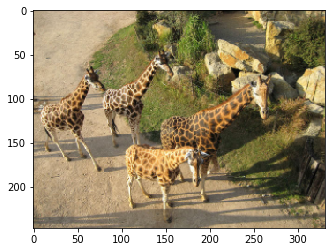

In [17]:
parser = argparse.ArgumentParser()
parser.add_argument('--image', type=str, required=True, help='input image for generating caption')
parser.add_argument('--encoder_path', type=str, default='models/encoder-2-1000.ckpt', help='path for trained encoder')
parser.add_argument('--decoder_path', type=str, default='models/decoder-2-1000.ckpt', help='path for trained decoder')
parser.add_argument('--vocab_path', type=str, default='data/vocab.pkl', help='path for vocabulary wrapper')

# Model parameters (should be same as paramters in train.py)
parser.add_argument('--embed_size', type=int , default=256, help='dimension of word embedding vectors')
parser.add_argument('--hidden_size', type=int , default=512, help='dimension of lstm hidden states')
parser.add_argument('--num_layers', type=int , default=1, help='number of layers in lstm')
args = parser.parse_args(["--image", "png/example.png"])
main(args)

In [25]:
from pathlib import Path
p = Path("/home/yang/data/pascal/VOCdevkit/VOC2007/JPEGImages")

In [34]:
np.random.choice(list(p.iterdir()))

PosixPath('/home/yang/data/pascal/VOCdevkit/VOC2007/JPEGImages/008274.jpg')

<start> a man riding a horse in a field . <end>


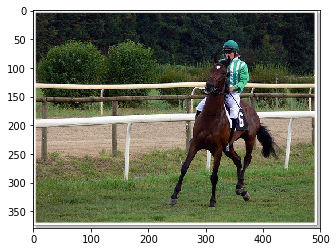

In [42]:
args = parser.parse_args(f"--image {np.random.choice(list(p.iterdir()))}".split())

main(args)